In [86]:
import pandas as pd
import numpy as np
import os
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
ruta_df =  os.path.join("..","..","..", "data", "P2_dif","completo_dif.parquet")
df = pd.read_parquet(ruta_df)
df

,DATE,Peleador_A,Peleador_B,WINNER,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF,...,Record_DIFF,Peleas_DIFF,Puntos_DIFF,Racha_DIFF,Victorias_KO_DIFF,Victorias_Sub_DIFF,Victorias_Decision_DIFF,Derrotas_KO_DIFF,Derrotas_Sub_DIFF,Derrotas_Decision_DIFF
0,2011-01-01,Nate Diaz,Dong Hyun Kim,True,0.24,-0.2604,-0.434064,-0.68,0.12,-510.28,...,-4.0,6,5.866660,-3,-0.40,5.36,-0.96,0.00,0.00,3.00
1,2011-01-01,Chris Leben,Brian Stann,True,0.00,0.0352,0.363636,1.52,0.00,46.36,...,9.0,11,3.689413,2,5.60,1.00,1.00,1.00,1.00,1.40
2,2011-01-01,Frankie Edgar,Gray Maynard,True,0.00,0.0824,-0.320478,0.00,0.36,-63.16,...,4.0,0,4.637172,-3,0.00,1.00,-1.00,0.00,0.00,1.00
3,2011-01-01,Jeremy Stephens,Marcus Davis,False,0.56,0.1028,0.079909,-0.24,0.00,-13.76,...,-3.0,-4,-3.755388,0,0.40,-4.00,-0.40,-2.00,1.64,0.36
4,2011-01-01,Brandon Vera,Thiago Silva,True,0.00,0.1736,0.340426,0.00,0.00,88.08,...,8.0,5,-2.219119,0,-0.60,1.00,2.00,0.36,0.00,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,2025-04-05,Manuel Torres,Drew Dober,False,0.00,0.1544,0.242133,0.24,0.00,-20.40,...,-3.0,-20,84.052337,0,-7.00,-0.40,-3.00,-1.00,-4.00,-3.60
3118,2025-04-12,Loma Lookboonmee,Istela Nunes,False,-0.24,0.1976,0.549550,0.24,0.40,193.24,...,3.0,4,136.868902,3,0.00,0.60,4.36,-0.96,-1.00,1.00
3119,2025-04-12,Josh Emmett,Lerone Murphy,True,-0.04,-0.2400,-0.365385,-0.80,0.00,-236.68,...,2.0,6,-176.531311,-7,1.36,0.00,1.04,1.00,1.00,1.60
3120,2025-04-12,Pat Sabatini,Joanderson Brito,False,0.00,0.2212,-0.048376,-0.36,0.00,-25.60,...,-1.0,1,-192.276697,1,-2.60,0.36,3.00,1.60,0.00,-1.36


In [88]:
df["DATE"] = pd.to_datetime(df["DATE"])

# Filtra los combates después del 16 de febrero de 2025
df_antiguos = df[df["DATE"] <= "2025-02-16"]
df_antiguos = df_antiguos[df["DATE"] >= "2010-01-01"]
df_nuevos = df[df["DATE"] > "2025-02-16"]
df_nuevos

C:\Users\mattu\AppData\Local\Temp\ipykernel_549184\177468615.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_antiguos = df_antiguos[df["DATE"] >= "2010-01-01"]


,DATE,Peleador_A,Peleador_B,WINNER,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF,...,Record_DIFF,Peleas_DIFF,Puntos_DIFF,Racha_DIFF,Victorias_KO_DIFF,Victorias_Sub_DIFF,Victorias_Decision_DIFF,Derrotas_KO_DIFF,Derrotas_Sub_DIFF,Derrotas_Decision_DIFF
3085,2025-03-01,Andre Fili,Melquizael Costa,True,0.40,-0.0464,-0.182708,-1.12,-0.36,-109.04,...,2.0,19,-1.147212e-07,0,4.00,-0.36,6.36,2.00,1.00,5.00
3086,2025-03-01,Brendan Allen,Anthony Hernandez,True,0.00,-0.0240,-0.017913,-1.28,0.00,-159.76,...,9.0,6,9.645258e+01,-6,-0.36,3.40,2.60,1.00,-1.00,0.36
3087,2025-03-01,Jean Silva,Melsik Baghdasaryan,False,0.88,0.0012,0.285714,0.00,0.00,-13.76,...,4.0,-1,2.153260e+02,2,0.96,0.00,-1.36,0.00,-0.60,0.00
3088,2025-03-01,Ricky Simon,Javid Basharat,False,0.00,-0.1476,-0.095434,0.00,0.00,-59.80,...,0.0,8,1.666214e+01,0,1.00,3.00,1.00,2.00,0.00,1.60
3089,2025-03-01,Henry Cejudo,Song Yadong,True,-0.40,0.0452,0.016316,0.00,0.00,-81.40,...,1.0,0,-5.465342e-01,0,-1.00,-1.00,1.40,0.00,0.00,0.60
3090,2025-03-08,Nasrat Haqparast,Esteban Ribovics,False,0.24,-0.0068,-0.444444,0.00,0.00,-19.32,...,-3.0,9,3.301000e+01,1,1.00,0.00,5.00,1.00,0.00,2.00
3091,2025-03-08,Manel Kape,Asu Almabayev,False,0.40,0.0448,-0.229782,-0.96,-0.24,-487.76,...,-8.0,4,-1.109037e+02,-3,2.36,-1.00,0.04,0.00,0.00,2.60
3092,2025-03-08,Cody Brundage,Julian Marquez,False,0.00,-0.0336,0.227273,0.00,0.00,35.80,...,-2.0,3,9.656570e+00,1,2.00,-2.00,0.00,-0.96,1.60,1.00
3093,2025-03-08,Andrea Lee,JJ Aldrich,True,0.00,-0.1580,0.196721,0.24,0.32,-184.76,...,5.0,-2,-9.909213e+01,0,0.00,1.00,-4.60,-1.00,-1.00,3.60
3094,2025-03-08,Ricardo Ramos,Chepe Mariscal,True,0.00,-0.3796,0.082192,0.76,-0.96,-144.96,...,2.0,9,-1.852969e+02,-3,1.00,1.00,2.40,2.00,1.60,1.00


In [89]:
#Leo los df divididos en orden cronológico de forma que los resultados sean lo más reales posibles
ruta_train =  os.path.join("..","..","..", "data", "P2_dif","train.parquet")
df_train = pd.read_parquet(ruta_train)
df_train.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF,...,Record_DIFF,Peleas_DIFF,Puntos_DIFF,Racha_DIFF,Victorias_KO_DIFF,Victorias_Sub_DIFF,Victorias_Decision_DIFF,Derrotas_KO_DIFF,Derrotas_Sub_DIFF,Derrotas_Decision_DIFF
0,2010-01-02,Rashad Evans,Thiago Silva,False,0.04,-0.2808,0.193548,-0.40,0.00,-18.84,...,16.0,4,-8.784941,-1,-0.76,0.00,4.00,-0.24,0.0,1.0
1,2010-01-02,Sam Stout,Joe Lauzon,False,0.36,-0.2228,-0.371306,-2.72,0.00,-101.68,...,-3.0,1,-9.062451,-1,-1.60,-2.36,2.36,-1.00,1.0,2.6
2,2010-01-11,Rafael Dos Anjos,Kyle Bradley,False,0.00,0.0416,0.086912,1.52,0.24,213.96,...,0.0,0,-9.999992,0,-0.36,0.00,0.36,-0.60,0.0,0.6
3,2010-01-11,Amir Sadollah,Brad Blackburn,False,-1.84,-0.0176,0.000000,0.44,0.00,23.04,...,-4.0,0,-0.381411,-2,-1.00,1.00,-0.60,0.60,0.0,0.0
4,2010-01-11,Gray Maynard,Nate Diaz,False,0.00,0.0492,0.328320,-0.52,-0.48,249.72,...,-1.0,-1,-3.628998,5,1.00,-4.36,2.96,0.00,0.0,-1.6


In [90]:
X_train = df_antiguos.drop(columns=["WINNER", "DATE","Peleador_A","Peleador_B"])
y_train = df_antiguos["WINNER"]
X_test = df_nuevos.drop(columns=["WINNER", "DATE","Peleador_A","Peleador_B"])
y_test = df_nuevos["WINNER"]

In [91]:

params = {'n_estimators': 100, 'max_depth': 39, 'learning_rate': 0.013855267540212752, 'subsample': 0.7097002483532678, 'colsample_bytree': 0.9049166524337446, 'gamma': 0.3376761198544125, 'min_child_weight': 13, 'scale_pos_weight': np.float64(1.2905829596412555), 'reg_alpha': 0.5, 'tree_method': 'exact', 'grow_policy': 'lossguide'} 

xgboost_dif = XGBClassifier(**params)

xgboost_dif.fit(X_train, y_train)

y_pred_xgboost_dif = xgboost_dif.predict(X_test)

print("Reporte de clasificación xgboost_dif:")
print(classification_report(y_test, y_pred_xgboost_dif))
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgboost_dif):.4f}')
print(f"F1-score: {f1_score(y_test,y_pred_xgboost_dif)}")

Reporte de clasificación xgboost_dif:
              precision    recall  f1-score   support

       False       0.74      0.61      0.67        23
        True       0.50      0.64      0.56        14

    accuracy                           0.62        37
   macro avg       0.62      0.63      0.61        37
weighted avg       0.65      0.62      0.63        37

Accuracy: 0.6216
F1-score: 0.5625


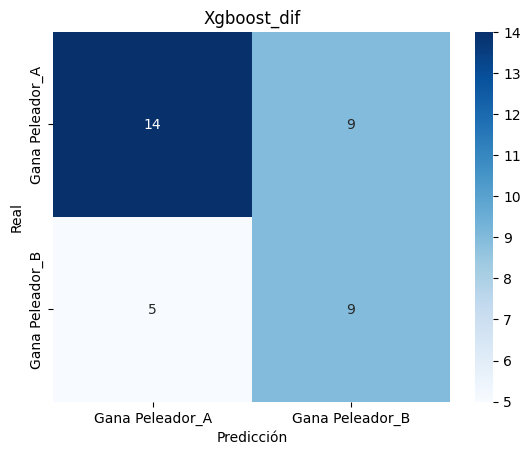

In [92]:
cm = confusion_matrix(y_test, y_pred_xgboost_dif)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Gana Peleador_A', 'Gana Peleador_B'], yticklabels=['Gana Peleador_A', 'Gana Peleador_B'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Xgboost_dif')
plt.show()

In [93]:
y_pred_probs = xgboost_dif.predict_proba(X_test)
df_nuevos = df_nuevos.reset_index(drop=True)
# Creamos el DataFrame con los datos
df_resultados = pd.DataFrame({
    'Peleador A': df_nuevos['Peleador_A'].values,
    'Peleador B': df_nuevos['Peleador_B'].values,
    'Ganador': y_test.values,
    'Predicción': y_pred_xgboost_dif,
    'Probabilidad A': y_pred_probs[:, 0],  # Asumiendo clase 1 es A gana
    'Probabilidad B': y_pred_probs[:, 1]   # Asumiendo clase 0 es B gana
})



# Mostrar los primeros resultados
df_resultados

,Peleador A,Peleador B,Ganador,Predicción,Probabilidad A,Probabilidad B
0,Andre Fili,Melquizael Costa,True,1,0.402056,0.597944
1,Brendan Allen,Anthony Hernandez,True,0,0.530041,0.469959
2,Jean Silva,Melsik Baghdasaryan,False,0,0.624006,0.375994
3,Ricky Simon,Javid Basharat,False,1,0.468193,0.531807
4,Henry Cejudo,Song Yadong,True,1,0.456589,0.543411
5,Nasrat Haqparast,Esteban Ribovics,False,0,0.534121,0.465879
6,Manel Kape,Asu Almabayev,False,1,0.344392,0.655608
7,Cody Brundage,Julian Marquez,False,1,0.490346,0.509654
8,Andrea Lee,JJ Aldrich,True,1,0.427464,0.572536
9,Ricardo Ramos,Chepe Mariscal,True,1,0.357991,0.642009


In [94]:
len(df_nuevos), len(df_antiguos), len(df)

(37, 3085, 3122)

In [95]:
y_test_series = pd.Series(y_test).reset_index(drop=True)
y_pred_series = pd.Series(y_pred_xgboost_dif).reset_index(drop=True)

# Crear un DataFrame con los valores reales y predichos
df_errores = pd.DataFrame({
    'Real': y_test_series,
    'Predicho': y_pred_series
})

# Filtrar los errores
errores = df_errores[df_errores['Real'] != df_errores['Predicho']]

# Mostrarlos
print("Predicciones fallidas:")
print(errores)

Predicciones fallidas:
     Real  Predicho
1    True         0
3   False         1
6   False         1
7   False         1
11  False         1
14   True         0
15   True         0
18  False         1
19  False         1
22   True         0
24  False         1
31   True         0
35  False         1
36  False         1


In [96]:
df_nuevos = df_nuevos.reset_index(drop=True)

# Unir con las predicciones fallidas
errores_completos = df_nuevos.loc[errores.index]
errores_completos['Real'] = errores['Real']
errores_completos['Predicho'] = errores['Predicho']

print("Detalles de los errores:")
print(errores_completos)

Detalles de los errores:
         DATE           Peleador_A                 Peleador_B  WINNER  \
1  2025-03-01        Brendan Allen          Anthony Hernandez    True   
3  2025-03-01          Ricky Simon             Javid Basharat   False   
6  2025-03-08           Manel Kape              Asu Almabayev   False   
7  2025-03-08        Cody Brundage             Julian Marquez   False   
11 2025-03-15         Amanda Lemos             Iasmin Lucindo   False   
14 2025-03-15         Alex Pereira           Magomed Ankalaev    True   
15 2025-03-22        Josiane Nunes         Priscila Cachoeira    True   
18 2025-03-22  Alexander Hernandez             Kurt Holobaugh   False   
19 2025-03-22       Chidi Njokuani  Elizeu Zaleski dos Santos   False   
22 2025-03-29        Gunnar Nelson              Kevin Holland    True   
24 2025-03-29        Marcin Tybura                Mick Parkin   False   
31 2025-04-05  Christian Rodriguez           Melquizael Costa    True   
35 2025-04-12         Pat 

In [97]:
# Crear un DataFrame para las importancias de las características
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgboost_dif.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                    Feature  Importance
20               Racha_DIFF    0.063911
19              Puntos_DIFF    0.055873
26   Derrotas_Decision_DIFF    0.045824
18              Peleas_DIFF    0.043214
24         Derrotas_KO_DIFF    0.038740
25        Derrotas_Sub_DIFF    0.038387
8                 TD_A_DIFF    0.037261
15             STRIKER_DIFF    0.036264
9           STR_HEAD_A_DIFF    0.036211
7          TOTAL_STR_A_DIFF    0.036061
4                  REV_DIFF    0.035917
14        STR_GROUND_A_DIFF    0.035555
0                   KD_DIFF    0.035306
5                 CTRL_DIFF    0.035091
16            GRAPPLER_DIFF    0.034702
2                   TD_DIFF    0.034571
3              SUB_ATT_DIFF    0.034458
13        STR_CLINCH_A_DIFF    0.034335
6              TD_PORC_DIFF    0.034094
1              SIG_STR_DIFF    0.033563
21        Victorias_KO_DIFF    0.033528
12      STR_DISTANCE_A_DIFF    0.032713
11           STR_LEG_A_DIFF    0.032247
10          STR_BODY_A_DIFF    0.031842


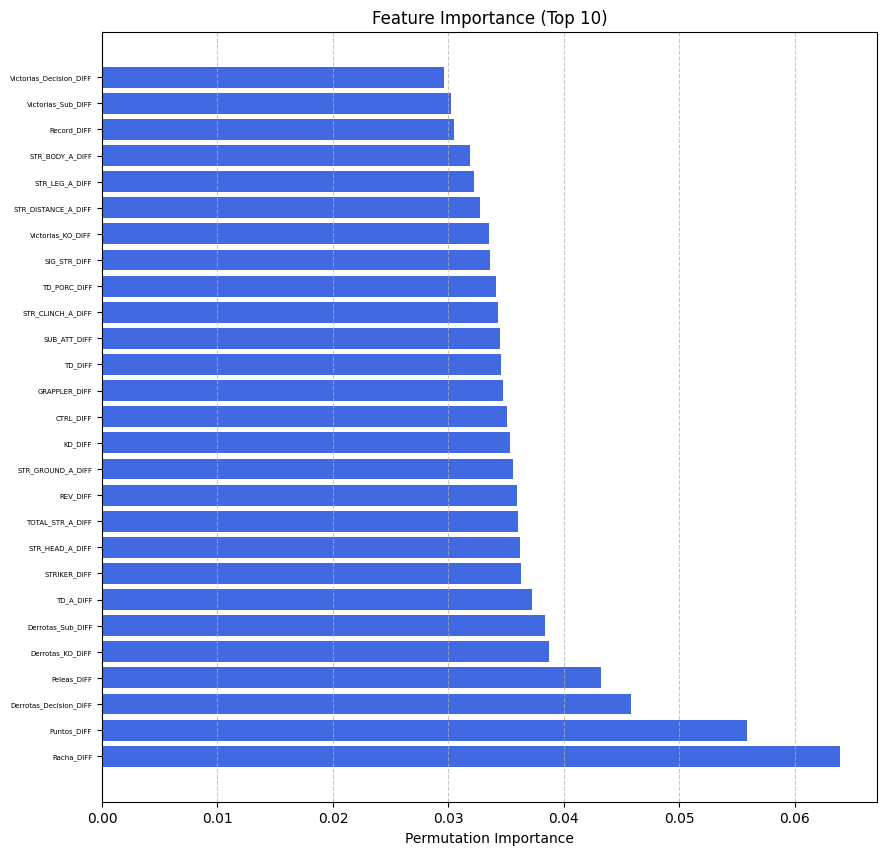

In [98]:
plt.figure(figsize=(10, 10))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="royalblue")
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Top 10)")
plt.yticks(fontsize=5)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()